<a href="https://colab.research.google.com/github/bengosney/Advent-Of-Code-2018/blob/master/AdventOfCode_2018_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advent of Code - Day 3

## The input
Nothing to see here...

In [0]:
with open('day3') as f:
  data = f.read()
  
data = data.splitlines()

## Part One

In [0]:
import re
import numpy as np

Build up my cutting list in a massive array.

God bless numpy! Also if I set the size to 1000 x 1000 I get an index error so I add one to the size

In [0]:
fab = np.zeros((1001,1001))

for line in data:
  m = re.search('#(\d+) @ (\d+),(\d+): (\d+)x(\d+)', line)
  idx, x, y, w, h = map(int, m.groups())

  fab[x:x+w, y:y+h] += 1

Count the overlaps

In [5]:
sum(sum(fab > 1))

112378

## Part 2

Loop the list again to find the area that is all 1's

In [6]:
x, y, w, h = [0,0,0,0]

for line in data:
  m = re.search('#(\d+) @ (\d+),(\d+): (\d+)x(\d+)', line)
  idx, x, y, w, h = map(int, m.groups())
  
  if np.all(fab[x:x + w, y:y+h] == 1):
    print(idx)
    x, y, w, h = [x, x + w, y, y+h]

603


## Fun

lets show the fabric as a heatmap

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

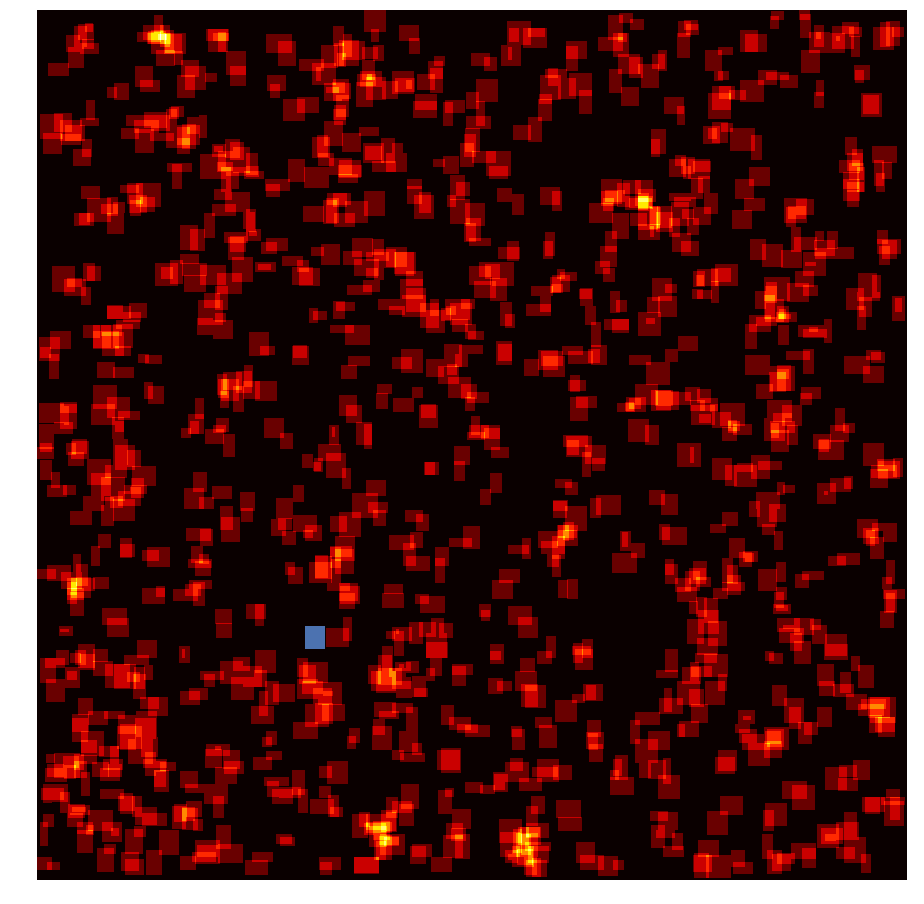

In [14]:
fig = plt.figure(figsize=(18,16))
ax = plt.gca()
plt.axis('off')
plt.imshow(fab, cmap='hot', interpolation='nearest')
ax.add_patch(Rectangle((x, y), h, w, fill=True, lw=3))
plt.show()